# 1. Importar librerías

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from importlib import reload
import utils  # Importa el módulo
reload(utils)  # Recarga el módulo

<module 'utils' from 'c:\\Users\\USUARIO\\OneDrive - Universidad de Antioquia\\Aprendizaje\\Universidad\\2023-2\\Analítica II\\Caso Estudio Supervisado\\pediccion_abandono_empleo\\utils.py'>

# 2. Importar datos

In [3]:
df = pd.read_csv('Datasets/datos_limpios.csv')
df.job_level = df.job_level.astype(str)
df.stock_option_level = df.stock_option_level.astype(str)
df.drop(['employee_id'], axis=1, inplace=True)

In [4]:
df.shape

(4401, 26)

# 3. Tratamiento de valores atípicos

## 3.1. Observar valores atípicos

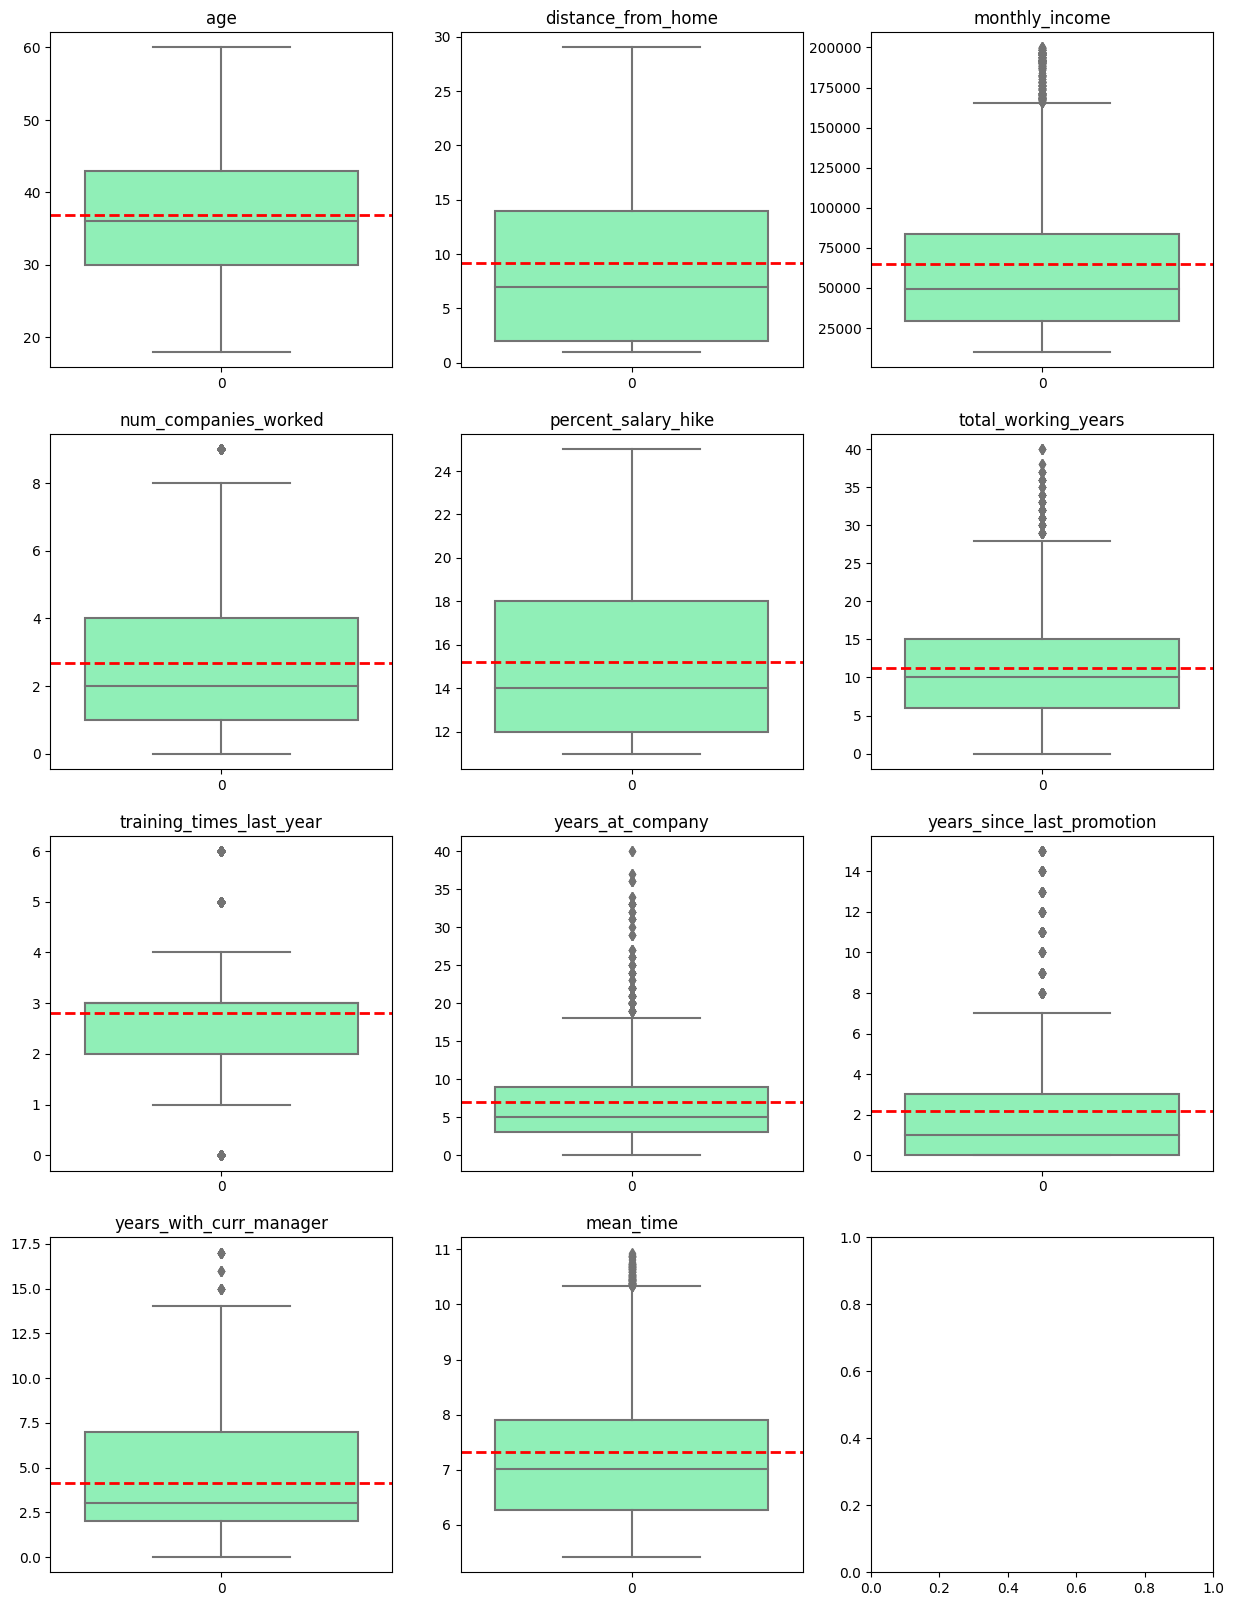

In [5]:
fig, axs = plt.subplots(4, 3, figsize=(15, 20))

rows = [0,0,0,1,1,1,2,2,2,3,3]
cols = [0,1,2,0,1,2,0,1,2,0,1]
variables = df.select_dtypes(include=['int64', 'float64']).columns

for i in range(len(variables)):

    sns.boxplot(df[variables[i]], palette='rainbow', ax=axs[rows[i], cols[i]])
    axs[rows[i], cols[i]].set_title(variables[i])
    axs[rows[i], cols[i]].axhline(df[variables[i]].mean(), color='r',linestyle='dashed',linewidth=2)

¿Los valores extremos de ingresos mensuales dependen del puesto, nivel o departamento del empleado?

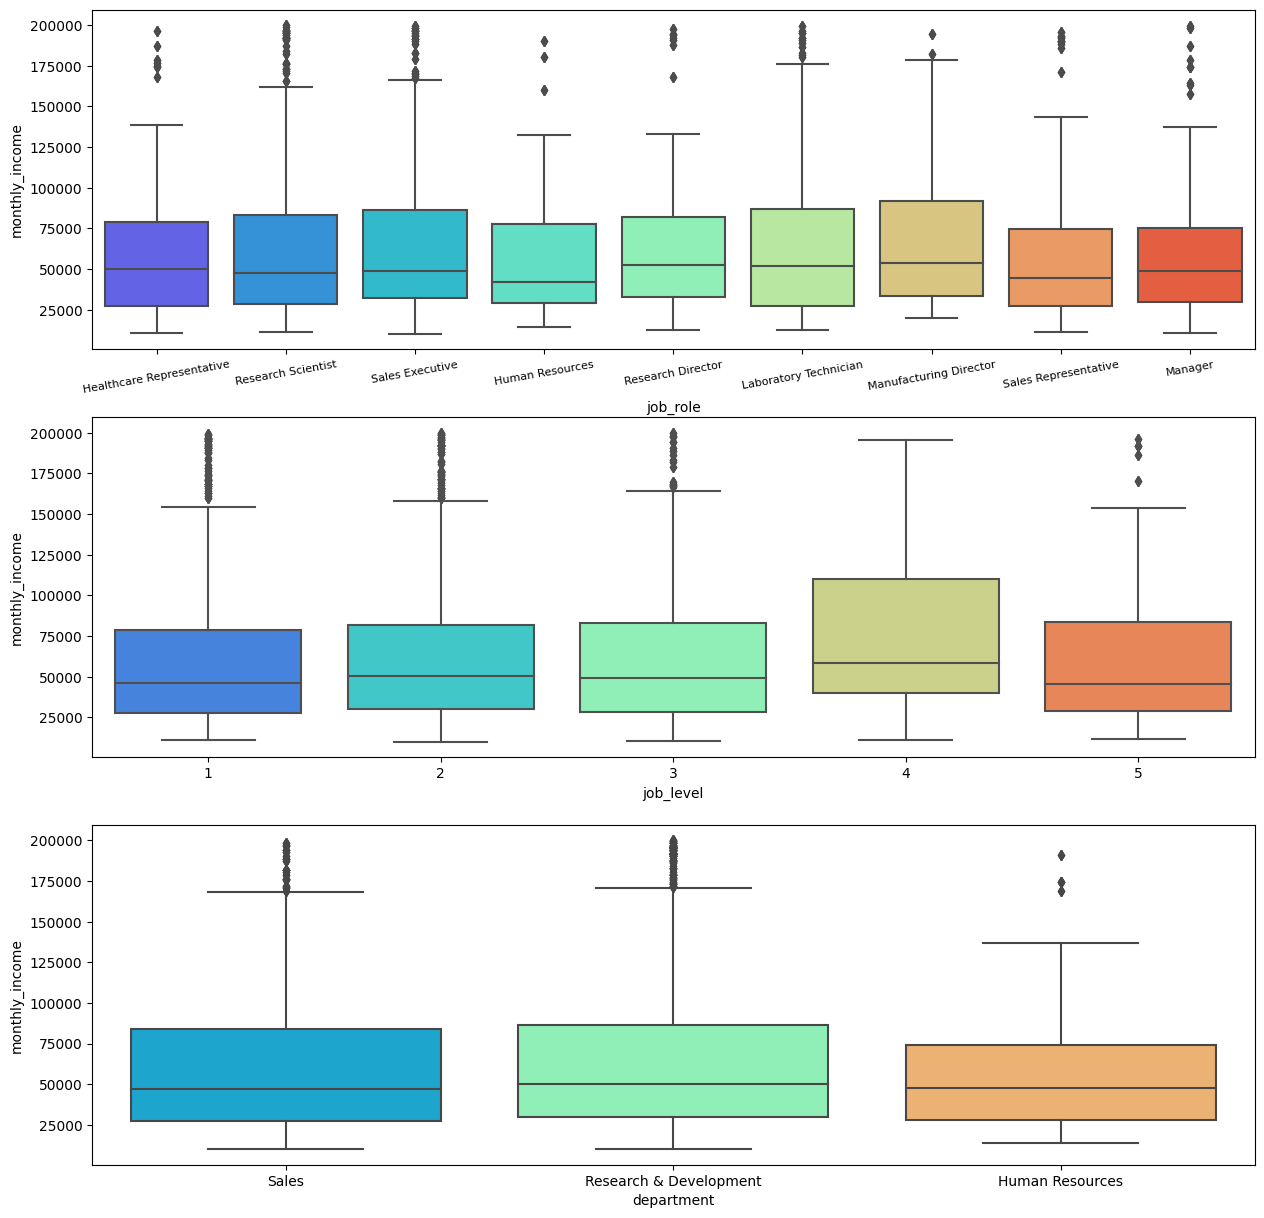

In [36]:
fig, axs = plt.subplots(3, 1, figsize=(15, 15))
sns.boxplot(x = 'job_role', y = 'monthly_income', data = df, palette='rainbow', ax=axs[0])
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=10, ha='center', fontsize=8)
sns.boxplot(x = 'job_level', y = 'monthly_income', data = df, palette='rainbow', ax=axs[1], order=['1','2','3','4','5'])
sns.boxplot(x = 'department', y = 'monthly_income', data = df, palette='rainbow', ax=axs[2])
plt.show()

¿Los valores extremos de tiempo promedio de trabajo al día dependen del puesto, nivel o departamento del empleado?

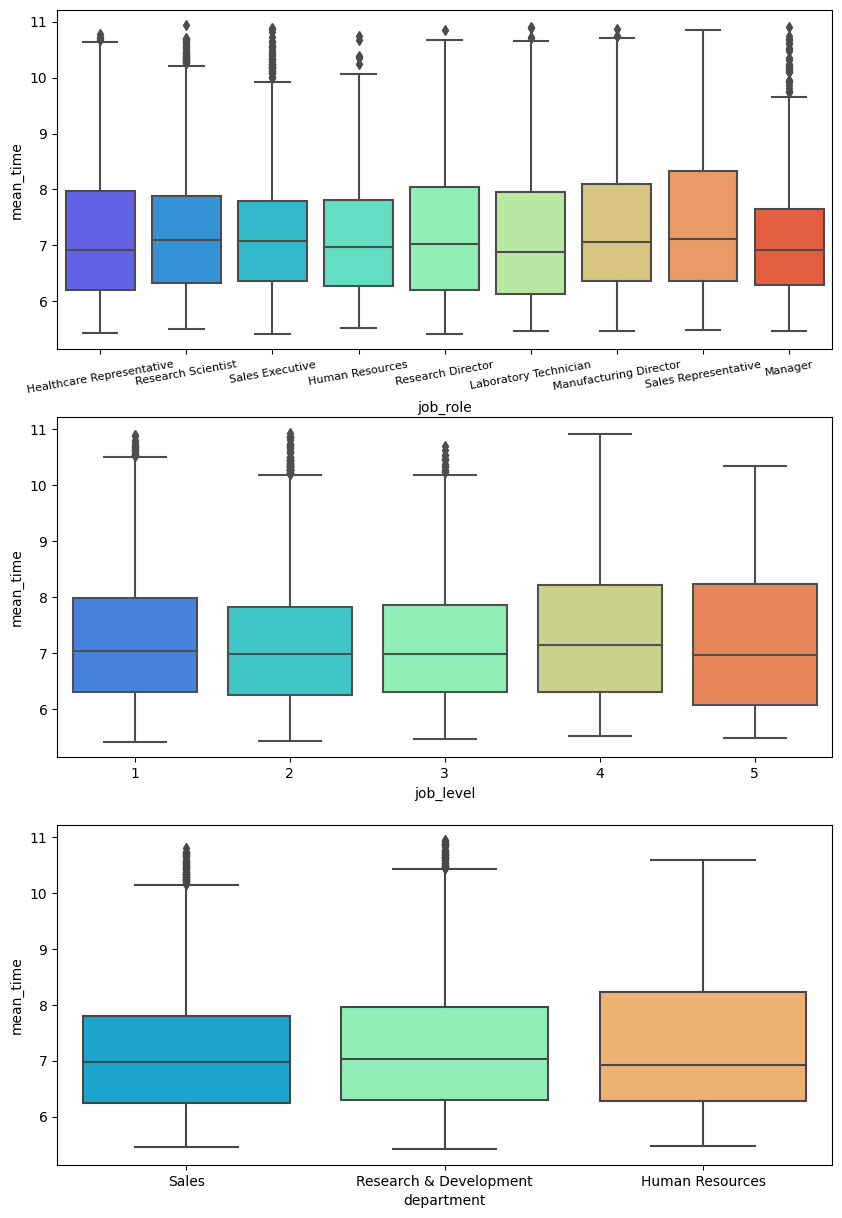

In [30]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
sns.boxplot(x = 'job_role', y = 'mean_time', data = df, palette='rainbow', ax=axs[0])
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=10, ha='center', fontsize=8)
sns.boxplot(x = 'job_level', y = 'mean_time', data = df, palette='rainbow', ax=axs[1], order=['1','2','3','4','5'])
sns.boxplot(x = 'department', y = 'mean_time', data = df, palette='rainbow', ax=axs[2])
plt.show()

¿Los empleados con mayores ingresos tienen una mejor satisfacción laboral?

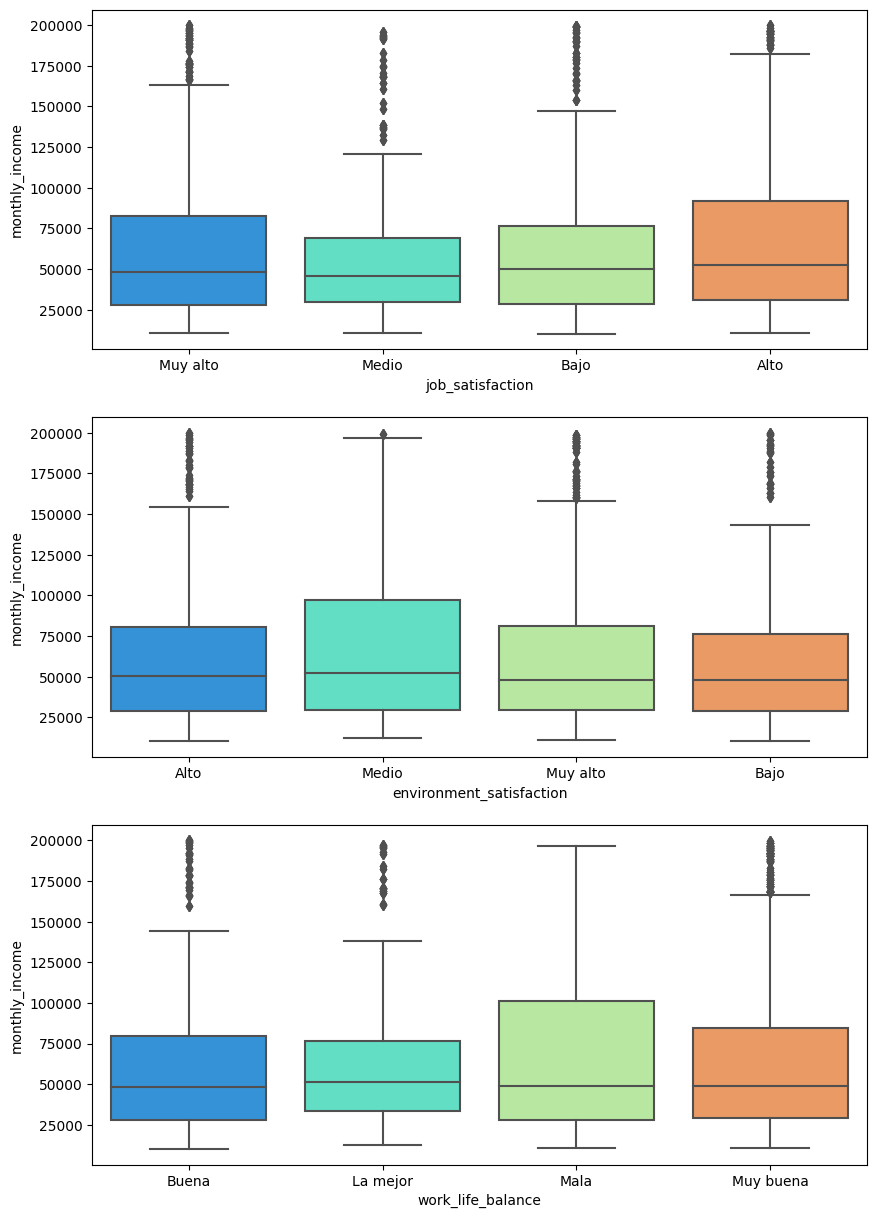

In [31]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
sns.boxplot(x = 'job_satisfaction', y = 'monthly_income', data = df, palette='rainbow', ax=axs[0])
sns.boxplot(x = 'environment_satisfaction', y = 'monthly_income', data = df, palette='rainbow', ax=axs[1])
sns.boxplot(x = 'work_life_balance', y = 'monthly_income', data = df, palette='rainbow', ax=axs[2])
plt.show()

¿Dependen los ingresos del tiempo en la empresa?

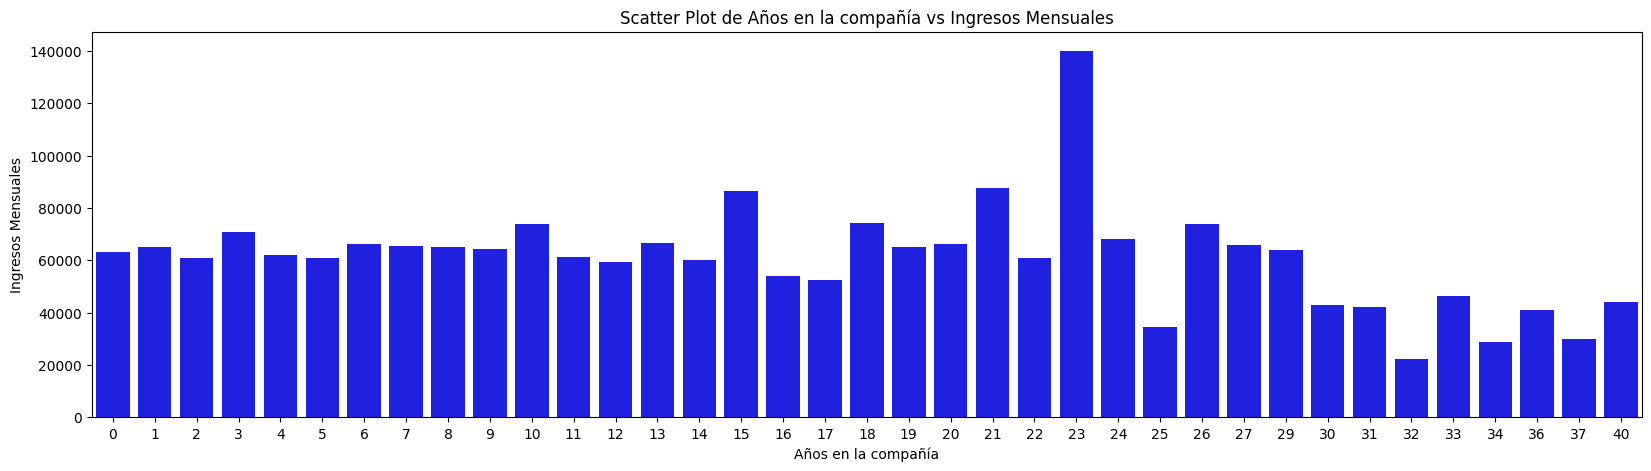

In [56]:
plt.figure(figsize=(20,5))
base = df.groupby(['years_at_company'])['monthly_income'].mean().reset_index()
sns.barplot(x='years_at_company', y='monthly_income', data=base, color='blue')

# Añadir etiquetas y título
plt.xlabel('Años en la compañía')
plt.ylabel('Ingresos Mensuales')
plt.title('Scatter Plot de Años en la compañía vs Ingresos Mensuales')
plt.show()

¿Dependen el tiempo de trabajo diario del tiempo en la empresa?

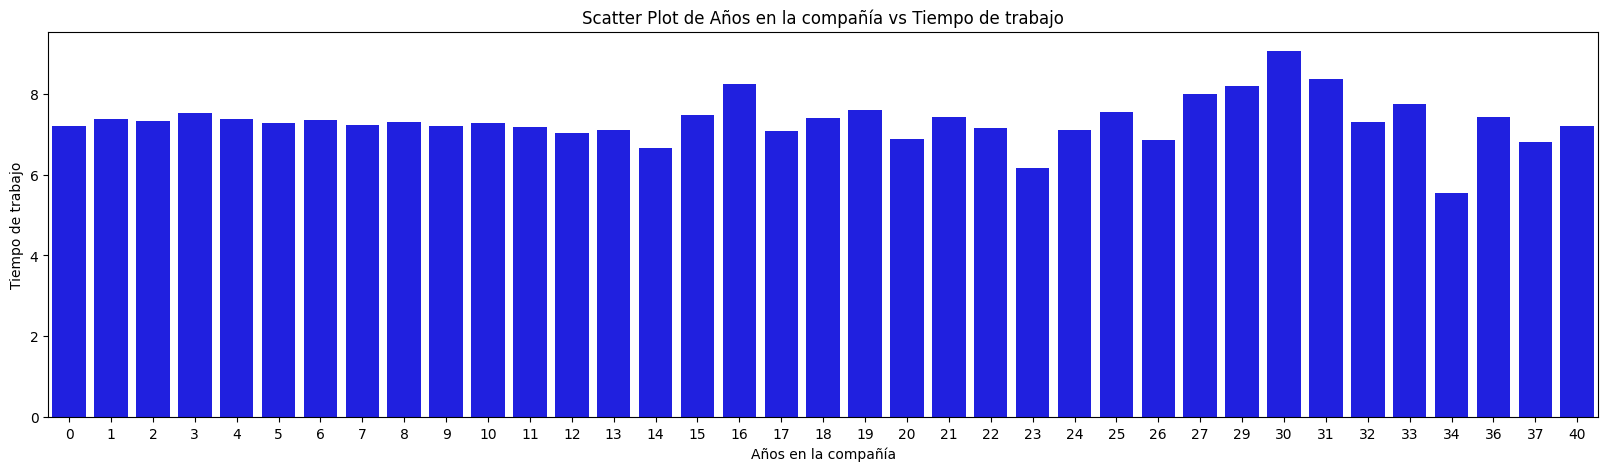

In [57]:
plt.figure(figsize=(20,5))
base = df.groupby(['years_at_company'])['mean_time'].mean().reset_index()
sns.barplot(x='years_at_company', y='mean_time', data=base, color='blue')

# Añadir etiquetas y título
plt.xlabel('Años en la compañía')
plt.ylabel('Tiempo de trabajo')
plt.title('Scatter Plot de Años en la compañía vs Tiempo de trabajo')
plt.show()

## 3.2. Técnica de imputación

#### Mediana por grupo con threshold de 2IQR (2 rangos intercuartílicos)

Debido a la naturaleza de variables como **Ingreso mensual** se encuentran valores que son muy extremos, pues es normal que hayan unos pocos empleados en la empresa que ganen mucho más que el resto de los empleados, pero esto no depende del rol, el departamento o del nivel del puesto. Tampoco depende del tiempo, pues la correlación entre años del empleado en la empresa y los ingresos mensuales es de casi 0.

También en las variables **Años trabajando**, **Años en la compañía**, **Años desde la última promoción** y **Años bajo el mando del mismo jefe** es natural encontrar valores extremos.

Durante el análisis exploratorio de las variables numéricas frente a la variable objetivo y el análisis de correlaciones, se evidencia una diferencia de algunas distribuciones dependiendo de si el emplado abandonó o no. Por esto, se decidió imputar valores atípicos con la técnica de **mediana por grupo**, donde los grupos serían si el empleado abandonó o no. Además, se imputarán solo los valores que sean muy extremos usando un **threshold de 2IQR (2 rangos intercuartílicos)**, de esta forma evitamos al máximo alterar la naturaleza de los datos.

## 3.3. Imputar valores atípicos

In [8]:
df2 = df.copy()

### Ingresos mensuales

In [9]:
upper_mi, lower_mi = utils.outlier_IQR(df2, 'monthly_income', 2)

IQR is: 54690.0
Threshold is: 109380.0
Lower bound is: -80270.0
Upper bound is: 193180.0
total number of outliers are: 93


In [10]:
df2 = utils.imputar_outliers(df2, 'monthly_income', lower_mi, upper_mi)

### Total de años trabajando

In [11]:
upper_twy, lower_twy = utils.outlier_IQR(df2, 'total_working_years', 2)

IQR is: 9.0
Threshold is: 18.0
Lower bound is: -12.0
Upper bound is: 33.0
total number of outliers are: 63


In [12]:
df2 = utils.imputar_outliers(df2, 'total_working_years', lower_twy, upper_twy)

### Años en la compañía

In [13]:
upper_yac, lower_yac = utils.outlier_IQR(df2, 'years_at_company', 2)

IQR is: 6.0
Threshold is: 12.0
Lower bound is: -9.0
Upper bound is: 21.0
total number of outliers are: 156


In [14]:
df2 = utils.imputar_outliers(df2, 'years_at_company', lower_yac, upper_yac)

### Años desde la última promoción

In [15]:
upper_yslp, lower_yslp = utils.outlier_IQR(df2, 'years_since_last_promotion', 2)

IQR is: 3.0
Threshold is: 6.0
Lower bound is: -6.0
Upper bound is: 9.0
total number of outliers are: 215


In [16]:
df2 = utils.imputar_outliers(df2, 'years_since_last_promotion', lower_yslp, upper_yslp)

### Años con el jefe actual

In [17]:
upper_ywcm, lower_ywcm = utils.outlier_IQR(df2, 'years_with_curr_manager', 2)

IQR is: 5.0
Threshold is: 10.0
Lower bound is: -8.0
Upper bound is: 17.0
total number of outliers are: 0


In [18]:
df2 = utils.imputar_outliers(df2, 'years_since_last_promotion', lower_ywcm, upper_ywcm)

### Tiempo promedio de trabao al día del empleado

In [19]:
upper_mt, lower_mt = utils.outlier_IQR(df2, 'mean_time', 2)

IQR is: 1.6218999999999992
Threshold is: 3.2437999999999985
Lower bound is: 3.034600000000002
Upper bound is: 11.144099999999998
total number of outliers are: 0


In [20]:
df2 = utils.imputar_outliers(df2, 'mean_time', lower_mt, upper_mt)

## 3.4. Revisar valores atípicos nuevamente

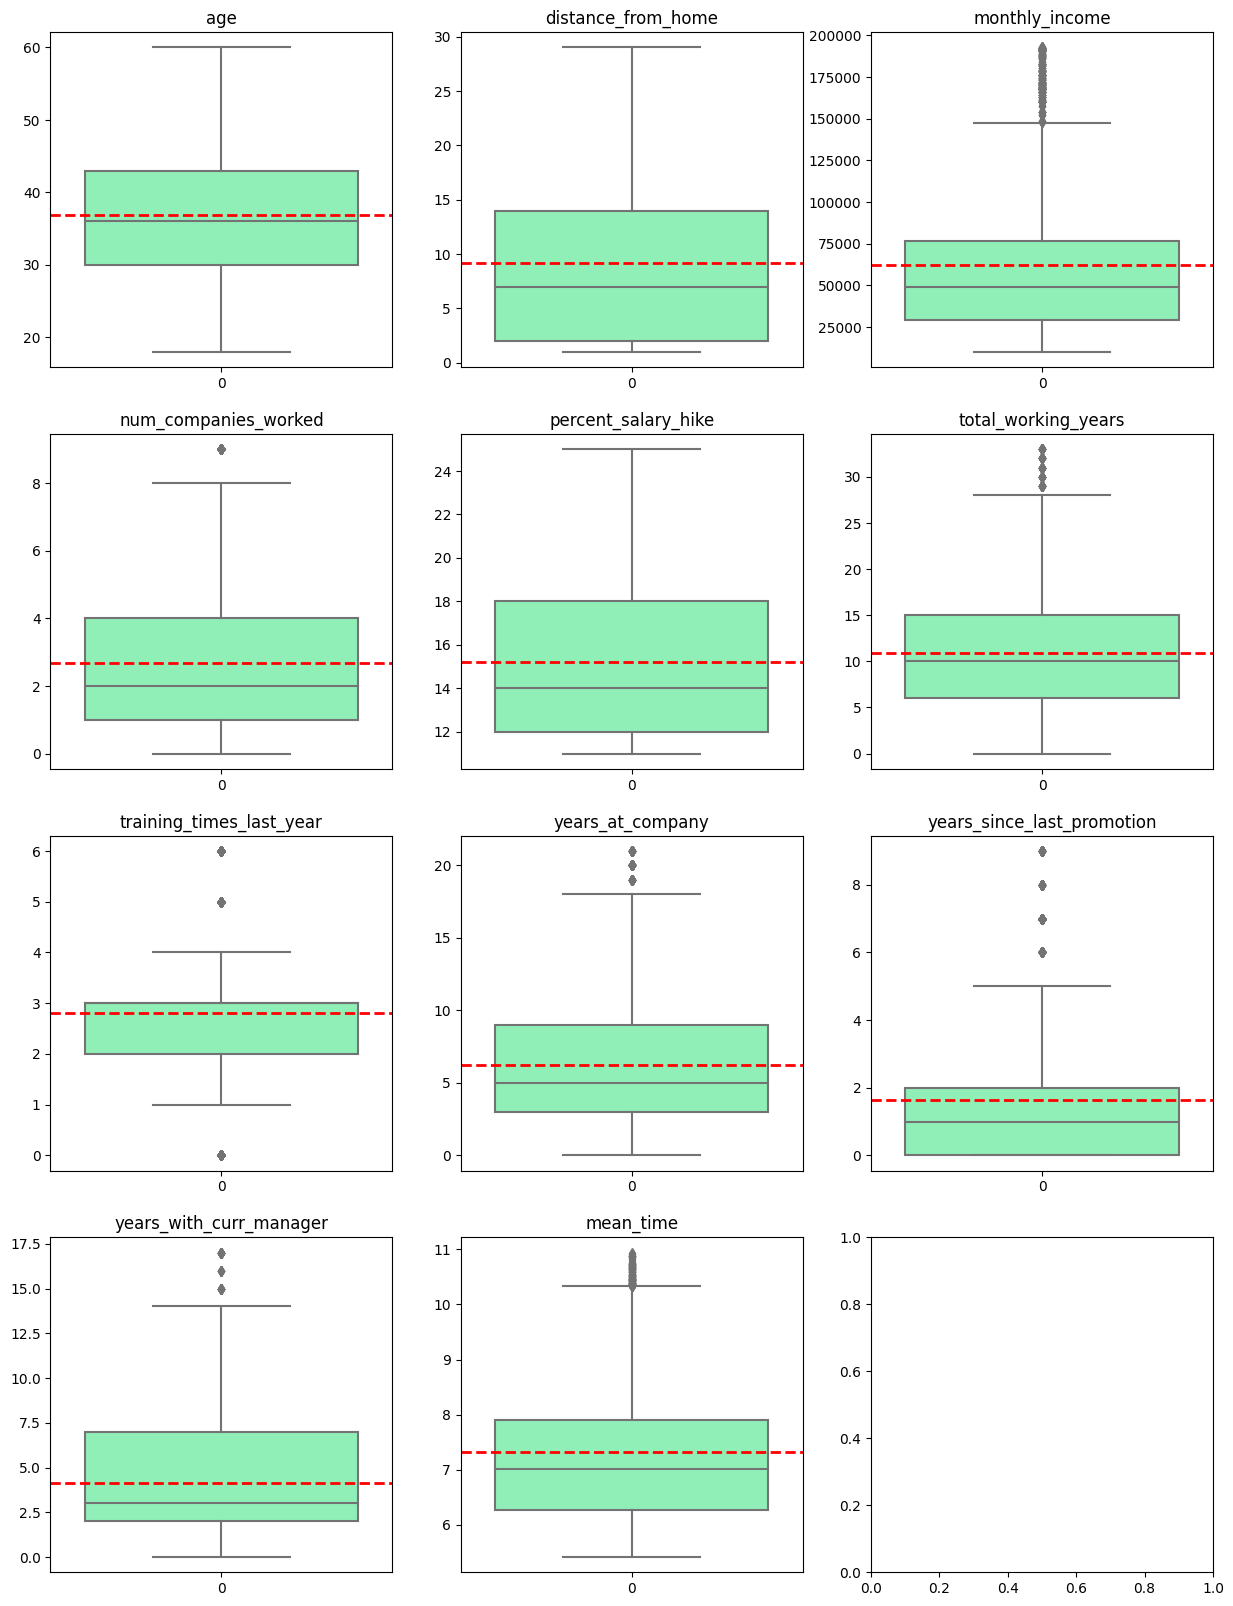

In [21]:
fig, axs = plt.subplots(4, 3, figsize=(15, 20))

rows = [0,0,0,1,1,1,2,2,2,3,3]
cols = [0,1,2,0,1,2,0,1,2,0,1]
variables = df2.select_dtypes(include=['int64', 'float64']).columns

for i in range(len(variables)):

    sns.boxplot(df2[variables[i]], palette='rainbow', ax=axs[rows[i], cols[i]])
    axs[rows[i], cols[i]].set_title(variables[i])
    axs[rows[i], cols[i]].axhline(df2[variables[i]].mean(), color='r',linestyle='dashed',linewidth=2)

Hay nuevos valores atípicos, pero estos son naturales en estos datos, imputarlos alteraría mucho la realidad de los datos.

# 4. Obtener dummies

In [22]:
df_final = pd.get_dummies(df2.drop(['attrition'], axis=1))
df_final['target'] = df2['attrition']

# 5. Binarizar variable objetivo

In [23]:
df_final.target.replace({'Yes':1, 'No':0}, inplace=True)

# 6. Exportar datos sin outliers

In [28]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4401 entries, 0 to 4400
Data columns (total 70 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   age                                     4401 non-null   int64  
 1   distance_from_home                      4401 non-null   int64  
 2   monthly_income                          4401 non-null   float64
 3   num_companies_worked                    4401 non-null   float64
 4   percent_salary_hike                     4401 non-null   int64  
 5   total_working_years                     4401 non-null   float64
 6   training_times_last_year                4401 non-null   int64  
 7   years_at_company                        4401 non-null   float64
 8   years_since_last_promotion              4401 non-null   float64
 9   years_with_curr_manager                 4401 non-null   int64  
 10  mean_time                               4401 non-null   floa

In [25]:
df_final.to_csv('Datasets/datos_preparados.csv', index=False)